In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors
tfpl = tfp.layers

In [2]:
print('TensorFlow version:', tf.__version__)
print('TensorFlow Probability version:', tfp.__version__)

TensorFlow version: 2.1.0
TensorFlow Probability version: 0.9.0


# Bijectors and normalising flows

 ## Coding tutorials
 #### [1. Bijectors](#coding_tutorial_1)
 #### [2. The TransformedDistribution class](#coding_tutorial_2)
 #### [3. Subclassing bijectors](#coding_tutorial_3)
 #### [4. Normalising flows](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Bijectors

In [3]:
# Define base distribution

normal = tfd.Normal(loc=0, scale=1)

In [4]:
# Sample from base distribution

n = 10000
z = normal.sample(n)
z

<tf.Tensor: shape=(10000,), dtype=float32, numpy=
array([-0.09434679, -0.42812154, -1.2303894 , ..., -0.34590492,
        1.380825  ,  0.7392942 ], dtype=float32)>

### Scale and shift bijector

In [5]:
# Define scale and shift

scale = 2
shift = 5

In [6]:
# Define chain bijector

scale_and_shift_chain = tfb.Chain([tfb.Shift(shift), tfb.Scale(scale)])
scale_and_shift_chain

In [7]:
# We can also use call methods

shift_bijector = tfb.Shift(shift)
scale_bijector = tfb.Scale(scale)
scale_and_shift_call = shift_bijector(scale_bijector)
scale_and_shift_call

In [8]:
# Apply the forward transformation

x = scale_and_shift_chain.forward(z)
print(x)
tf.norm(scale_and_shift_chain.forward(z) - scale_and_shift_chain(z))  # the bijector object itself is callable

tf.Tensor([4.8113065 4.143757  2.5392213 ... 4.3081903 7.76165   6.478588 ], shape=(10000,), dtype=float32)


<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [9]:
# Check the forward transformation

tf.norm(x - (scale * z + shift))

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

#### Plots

(array([0.00132744, 0.00132744, 0.00066372, 0.00132743, 0.00199115,
        0.00464602, 0.00929205, 0.00929205, 0.01194692, 0.02323012,
        0.03451326, 0.04778767, 0.07168151, 0.07566381, 0.09823021,
        0.13672584, 0.16128326, 0.20243389, 0.22632763, 0.27411539,
        0.3013277 , 0.33517742, 0.37035431, 0.3862836 , 0.3862836 ,
        0.37964642, 0.37433668, 0.38296501, 0.37566412, 0.31792063,
        0.30597384, 0.27610644, 0.24358438, 0.18517708, 0.15331878,
        0.11615059, 0.09292047, 0.07101773, 0.0584072 , 0.03252211,
        0.03252217, 0.02522127, 0.01659294, 0.01061948, 0.00331859,
        0.00331859, 0.00265487, 0.00132744, 0.00066372, 0.00199115]),
 array([-3.8196456 , -3.6689792 , -3.5183127 , -3.3676462 , -3.2169795 ,
        -3.066313  , -2.9156466 , -2.76498   , -2.6143136 , -2.4636471 ,
        -2.3129807 , -2.162314  , -2.0116475 , -1.860981  , -1.7103145 ,
        -1.559648  , -1.4089816 , -1.258315  , -1.1076485 , -0.95698196,
        -0.8063155 , -0.65

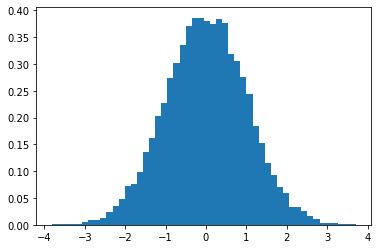

In [10]:
# Plot z density

plt.hist(z.numpy(), bins=50, density=True)

(array([0.00066372, 0.00066372, 0.00033186, 0.00066372, 0.00099558,
        0.00232301, 0.00464602, 0.00464602, 0.00597346, 0.01161506,
        0.01725666, 0.02389383, 0.03584075, 0.03783189, 0.04911511,
        0.06836292, 0.08064163, 0.10121694, 0.11316386, 0.13705759,
        0.15066391, 0.16758871, 0.18517723, 0.19314184, 0.19314153,
        0.18982325, 0.18716838, 0.19148254, 0.1878321 , 0.15896038,
        0.15298692, 0.13805327, 0.121792  , 0.09258861, 0.07665939,
        0.0580753 , 0.04646016, 0.03550895, 0.02920353, 0.01626111,
        0.01626106, 0.01261066, 0.00829646, 0.00530973, 0.0016593 ,
        0.00165929, 0.00132744, 0.00066372, 0.00033186, 0.00099557]),
 array([-2.6392913 , -2.3379583 , -2.0366251 , -1.7352922 , -1.4339592 ,
        -1.1326262 , -0.83129317, -0.52996016, -0.22862715,  0.07270587,
         0.37403888,  0.6753719 ,  0.9767049 ,  1.2780379 ,  1.579371  ,
         1.8807039 ,  2.1820369 ,  2.48337   ,  2.784703  ,  3.086036  ,
         3.3873692 ,  3.68

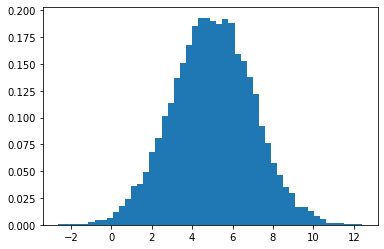

In [11]:
# Plot x density

plt.hist(x.numpy(), bins=50, density=True)

#### Inverse transformation

In [12]:
# Apply inverse transformation

x_inv = scale_and_shift_chain.inverse(x)
x_inv

<tf.Tensor: shape=(10000,), dtype=float32, numpy=
array([-0.09434679, -0.42812154, -1.2303894 , ..., -0.34590492,
        1.380825  ,  0.7392942 ], dtype=float32)>

In [13]:
# Check inverse transformation

tf.norm(x_inv - z)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

#### Log probability

In [14]:
# Compute log prob for x

print('shape of z:', z.shape)
print('shape of normal.log_prob(z):', normal.log_prob(z).shape)
print('shape of scale_and_shift_chain.forward_log_det_jacobian(z, event_ndims=0):',
      scale_and_shift_chain.forward_log_det_jacobian(z, event_ndims=0).shape)

log_prob_x_using_z = normal.log_prob(z)\
                   - scale_and_shift_chain.forward_log_det_jacobian(z, event_ndims=0)
print('shape of log_prob_x_using_z:', log_prob_x_using_z.shape)
log_prob_x_using_z

shape of z: (10000,)
shape of normal.log_prob(z): (10000,)
shape of scale_and_shift_chain.forward_log_det_jacobian(z, event_ndims=0): ()
shape of log_prob_x_using_z: (10000,)


<tf.Tensor: shape=(10000,), dtype=float32, numpy=
array([-1.6165364, -1.7037297, -2.3690147, ..., -1.6719108, -2.5654247,
       -1.8853636], dtype=float32)>

In [15]:
# We can also use the inverse transformation

log_prob_x_using_x = normal.log_prob(scale_and_shift_chain.inverse(x))\
                   + scale_and_shift_chain.inverse_log_det_jacobian(x, event_ndims=0)
print('shape of log_prob_x_using_x:', log_prob_x_using_x.shape)
log_prob_x_using_x

shape of log_prob_x_using_x: (10000,)


<tf.Tensor: shape=(10000,), dtype=float32, numpy=
array([-1.6165364, -1.7037297, -2.3690147, ..., -1.6719108, -2.5654247,
       -1.8853636], dtype=float32)>

In [16]:
# Verify two log prob of x results are equivalent

tf.norm(log_prob_x_using_z - log_prob_x_using_x)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

### Broadcasting

In [17]:
z = tf.random.normal(shape=(10, 1))
z

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[-2.0128253 ],
       [ 0.93187726],
       [ 1.0858886 ],
       [ 0.41991186],
       [ 0.57169235],
       [ 0.8553013 ],
       [ 0.7297623 ],
       [ 0.662877  ],
       [ 0.27293205],
       [-0.52711266]], dtype=float32)>

In [18]:
# Softfloor bijector

temperature = 0.01
softfloor_bijector = tfb.Softfloor(temperature)
x = softfloor_bijector(z)
x

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[-2.7828784e+00],
       [ 1.0989833e-03],
       [ 9.9981695e-01],
       [ 0.0000000e+00],
       [ 2.5032290e-19],
       [ 5.1977804e-07],
       [ 1.8353873e-12],
       [ 2.2852625e-15],
       [ 0.0000000e+00],
       [-1.0000000e+00]], dtype=float32)>

In [19]:
# Softfloor bijector using broadcasting

temperatures = [0.01, 0.1]
softfloor_bijector = tfb.Softfloor(temperatures)
x = softfloor_bijector(z)
x

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[-2.7828784e+00, -2.5324540e+00],
       [ 1.0989833e-03,  3.3376196e-01],
       [ 9.9981695e-01,  7.0517457e-01],
       [ 0.0000000e+00, -8.2041025e-03],
       [ 2.5032290e-19,  7.0133088e-03],
       [ 5.1977804e-07,  1.8626606e-01],
       [ 1.8353873e-12,  5.6902092e-02],
       [ 2.2852625e-15,  2.6873687e-02],
       [ 0.0000000e+00, -5.5312395e-02],
       [-1.0000000e+00, -1.0020940e+00]], dtype=float32)>

In [20]:
# Softfloor bijector using broadcasting

temperatures = [0.01, 0.1, 1, 2]
softfloor_bijector = tfb.Softfloor(temperatures)
softfloor_bijector(z).shape

TensorShape([10, 4])

In [21]:
# Plot routine

def _plot(bijector, params, z):
    bijector_params = tuple(getattr(bijector, name) for name in params)
    upper_params = [name[0].upper() + name[1:] for name in params]
    fig = plt.figure(figsize=(14, 5))
    lines = plt.plot(z, bijector.forward(z))
    for l in zip(lines, *bijector_params):
        labels = ": {:.4f}, ".join(upper_params) + ': {:.4f}'
        l[0].set_label(labels.format(*l[1:]))
    plt.legend()
    plt.show()

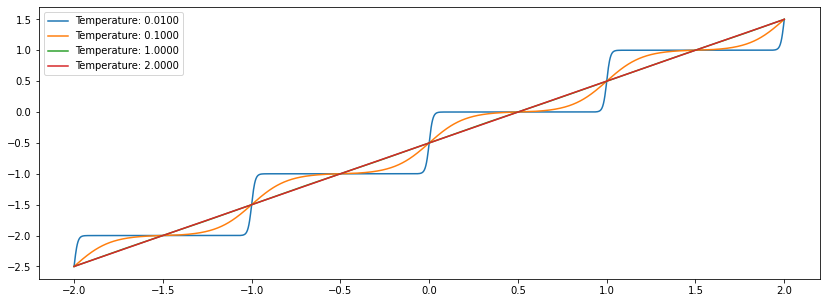

In [22]:
# Plot

z = np.linspace(-2, 2, 2000)[..., np.newaxis]
_plot(softfloor_bijector, ['temperature'], z)

In [23]:
# Gumbel bijector using broadcasting

gumbel_bijector = tfp.bijectors.GumbelCDF(loc=[0.5, 1, 1.5, 2, 3], scale=[1, 2, 2, 3, 4])
z = tf.random.normal((10, 1))
x = gumbel_bijector(z)
print('shape of z:', z.shape)
print('shape of x:', x.shape)

shape of z: (10, 1)
shape of x: (10, 5)


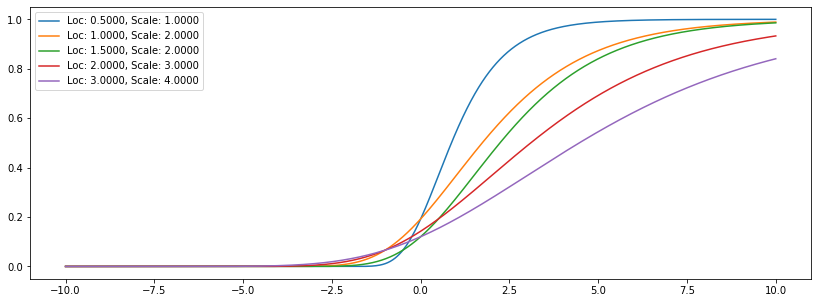

In [24]:
# Plot

z = np.linspace(-10, 10, 2000, dtype=np.float32)[..., np.newaxis]
_plot(gumbel_bijector, ['loc', 'scale'], z)

***
<a id="coding_tutorial_2"></a>
## The TransformedDistribution class

### TransformedDistribution

In [25]:
# Parameters

n = 10000
loc = 0
scale = 1

In [26]:
# Normal distribution

normal = tfd.Normal(loc=loc, scale=scale)

In [27]:
# Display event and batch shape

print('batch shape:', normal.batch_shape)
print('event shape:', normal.event_shape)

batch shape: ()
event shape: ()


In [28]:
# Exponential bijector

exp_bijector = tfb.Exp()

In [29]:
# Log normal transformed distribution using exp and normal bijectors

log_normal_td = tfd.TransformedDistribution(normal, exp_bijector)  # exp_bijector(normal)
log_normal_td

<tfp.distributions.TransformedDistribution 'expNormal' batch_shape=[] event_shape=[] dtype=float32>

In [30]:
# Display event and batch shape

print('batch shape:', log_normal_td.batch_shape)
print('event shape:', log_normal_td.event_shape)

batch shape: ()
event shape: ()


In [31]:
# Base distribution

n = 10000
z = normal.sample(n)

#### Plots

(array([0.00070981, 0.00283924, 0.00141962, 0.00283924, 0.00425885,
        0.00638829, 0.01490601, 0.01348637, 0.02555317, 0.04400823,
        0.04045911, 0.06601235, 0.07027121, 0.11498916, 0.11782839,
        0.14976995, 0.17248373, 0.18667993, 0.25198262, 0.2881827 ,
        0.27895529, 0.35277552, 0.3712305 , 0.38045807, 0.3612932 ,
        0.43795267, 0.37335997, 0.39536403, 0.38400716, 0.32651256,
        0.30095927, 0.26759833, 0.27327681, 0.22359003, 0.17603293,
        0.13060497, 0.11782839, 0.09511457, 0.07027115, 0.06104363,
        0.03549051, 0.02910222, 0.02626293, 0.02271393, 0.01348639,
        0.00922752, 0.00283924, 0.00283924, 0.00141962, 0.00141962]),
 array([-3.5866683 , -3.4457855 , -3.3049026 , -3.1640198 , -3.023137  ,
        -2.8822541 , -2.7413714 , -2.6004887 , -2.4596057 , -2.318723  ,
        -2.1778402 , -2.0369573 , -1.8960745 , -1.7551918 , -1.614309  ,
        -1.4734261 , -1.3325434 , -1.1916605 , -1.0507777 , -0.90989494,
        -0.7690121 , -0.62

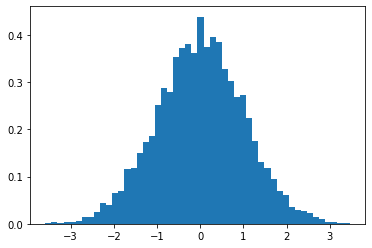

In [32]:
# Plot z density

plt.hist(z.numpy(), bins=50, density=True)

In [33]:
# Transformed distribution

x = log_normal_td.sample(n)

(array([5.26887390e-01, 3.61236133e-01, 1.74048919e-01, 1.02397652e-01,
        5.82420508e-02, 3.86022895e-02, 2.32968128e-02, 1.62536008e-02,
        1.16484064e-02, 1.11066272e-02, 5.95964594e-03, 4.06340283e-03,
        3.25071807e-03, 3.25071807e-03, 3.52161124e-03, 2.03170142e-03,
        9.48126103e-04, 8.12679517e-04, 1.21901928e-03, 2.70893172e-04,
        9.48127328e-04, 2.70893172e-04, 5.41786344e-04, 9.48126103e-04,
        5.41786344e-04, 8.12679517e-04, 0.00000000e+00, 1.35446936e-04,
        0.00000000e+00, 1.35446586e-04, 1.35446586e-04, 0.00000000e+00,
        0.00000000e+00, 2.70893172e-04, 1.35446586e-04, 0.00000000e+00,
        0.00000000e+00, 1.35446586e-04, 0.00000000e+00, 1.35446586e-04,
        1.35446586e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.35446936e-04]),
 array([1.1156965e-02, 7.4945515e-01, 1.4877534e+00, 2.2260516e+00,
        2.9643497e+00, 3.7

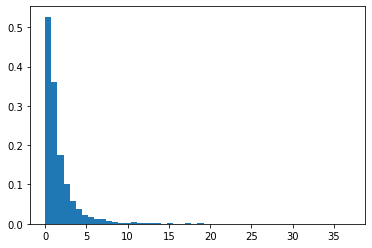

In [34]:
# Plot x density

plt.hist(x.numpy(), bins=50, density=True)

In [35]:
# Define log normal distribution

log_normal = tfd.LogNormal(loc, scale)

In [36]:
# Sample log_normal

x = log_normal.sample(n)

(array([3.44376576e-01, 5.33618603e-02, 1.52764754e-02, 5.62817514e-03,
        1.94658610e-03, 1.31183030e-03, 5.50122382e-04, 2.96219625e-04,
        1.26951370e-04, 4.23170892e-05, 8.46341784e-05, 4.23171234e-05,
        4.23170892e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.23170551e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.23170551e-05]),
 array([1.70529820e-02, 2.38016367e+00, 4.74327469e+00, 7.10638523e+00,
        9.46949577e+00

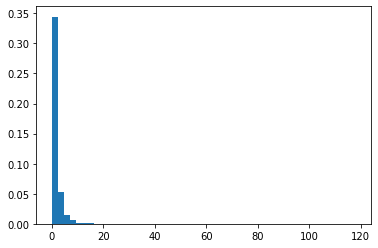

In [37]:
# Plot log normal density

plt.hist(x.numpy(), bins=50, density=True)

#### Log probability

In [38]:
# Log prob of LogNormal

log_prob = log_normal.log_prob(x)

In [39]:
# Log prob of log normal transformed distribution

log_prob_td = log_normal_td.log_prob(x)

In [40]:
# Check log probs

tf.norm(log_prob - log_prob_td)

<tf.Tensor: shape=(), dtype=float32, numpy=5.7871785e-06>

### Event shape and batch shape

In [41]:
# Set a scaling lower triangular matrix

normal = tfd.Normal(loc=0, scale=1)
tril = tf.random.normal((2, 4, 4))
scale_tril = tf.linalg.LinearOperatorLowerTriangular(tril)

In [42]:
# View of scale_tril

scale_tril.to_dense()

<tf.Tensor: shape=(2, 4, 4), dtype=float32, numpy=
array([[[ 0.6368002 ,  0.        ,  0.        ,  0.        ],
        [ 1.7932078 ,  0.714087  ,  0.        ,  0.        ],
        [-0.16575901,  0.2429108 ,  1.4299933 ,  0.        ],
        [-2.909056  ,  0.47281387, -1.2887577 ,  0.4526328 ]],

       [[-1.1832489 ,  0.        ,  0.        ,  0.        ],
        [ 0.05823401,  0.05091907,  0.        ,  0.        ],
        [ 1.6526215 ,  0.7668551 ,  1.5060371 ,  0.        ],
        [-0.3298764 ,  1.0608525 , -0.2530031 ,  0.05375383]]],
      dtype=float32)>

In [43]:
# Define scale linear operator

scale_lin_op = tfb.ScaleMatvecLinearOperator(scale_tril)
scale_lin_op

In [44]:
# Define scale linear operator transformed distribution with a batch and event shape

mvn_td = tfd.TransformedDistribution(normal, scale_lin_op, batch_shape=[2], event_shape=[4])
mvn_td

<tfp.distributions.TransformedDistribution 'scale_matvec_linear_operatorNormal' batch_shape=[2] event_shape=[4] dtype=float32>

In [45]:
# Display event and batch shape

print('batch shape:', mvn_td.batch_shape)
print('event shape:', mvn_td.event_shape)

batch shape: (2,)
event shape: (4,)


In [46]:
# Sample

n = 10
x = mvn_td.sample(n)
print('shape of x:', x.shape)

shape of x: (10, 2, 4)


In [47]:
# Define a MultivariateNormalLinearOperator distribution

mvn = tfd.MultivariateNormalLinearOperator(loc=0, scale=scale_tril)
mvn

<tfp.distributions.MultivariateNormalLinearOperator 'MultivariateNormalLinearOperator' batch_shape=[2] event_shape=[4] dtype=float32>

In [48]:
# Display event and batch shape

print('batch shape:', mvn.batch_shape)
print('event shape:', mvn.event_shape)

batch shape: (2,)
event shape: (4,)


In [49]:
# Sample

n = 10
x = mvn.sample(n)
print('shape of x:', x.shape)

shape of x: (10, 2, 4)


In [50]:
# Check

x = tf.random.normal((10, 2, 4))
tf.norm(mvn_td.log_prob(x) - mvn.log_prob(x))

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

***
<a id="coding_tutorial_3"></a>
## Subclassing bijectors

In [51]:
# Define a new bijector: Cubic

class Cubic(tfb.Bijector):

    def __init__(self, a, b, validate_args=False, name='Cubic'):
        self.a = tf.cast(a, tf.float32)
        self.b = tf.cast(b, tf.float32)
        if validate_args:
            assert tf.reduce_mean(tf.cast(tf.math.greater_equal(tf.abs(self.a), 1e-5), tf.float32)) == 1.0
            assert tf.reduce_mean(tf.cast(tf.math.greater_equal(tf.abs(self.b), 1e-5), tf.float32)) == 1.0
        super(Cubic, self).__init__(
            validate_args=validate_args, forward_min_event_ndims=0, name=name)
    
    def _forward(self, x):
        x = tf.cast(x, tf.float32)
        val = self.a * x + self.b
        return val ** 3
    
    def _inverse(self, y):
        y = tf.cast(y, tf.float32)
        val = tf.math.sign(y) * (tf.abs(y) ** (1/3))
        return (val - self.b) / self.a
    
    def _forward_log_det_jacobian(self, x):
        x = tf.cast(x, tf.float32)
        return tf.math.log(3 * tf.abs(self.a)) + 2 * tf.math.log(tf.abs(self.a * x + self.b))
    
    def _inverse_log_det_jacobian(self, y):
        y = tf.cast(y, tf.float32)
        return -self._forward_log_det_jacobian(self._inverse(y))

In [52]:
# Cubic bijector

a = [1, -2]
b = [-1, 0.4]
cubic_bijector = Cubic(a, b)
print('cubic_bijector.a:', cubic_bijector.a)
print('cubic_bijector.b:', cubic_bijector.b)

cubic_bijector.a: tf.Tensor([ 1. -2.], shape=(2,), dtype=float32)
cubic_bijector.b: tf.Tensor([-1.   0.4], shape=(2,), dtype=float32)


In [53]:
# Apply forward transformation

x = tf.constant([[3], [-3]])
y = cubic_bijector(x)
y

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[   8.     , -175.61598],
       [ -64.     ,  262.144  ]], dtype=float32)>

In [54]:
# Check inverse

y_inv = cubic_bijector.inverse(y)
y_inv

<tf.Tensor: shape=(2, 1), dtype=int32, numpy=
array([[ 3],
       [-3]])>

#### Function plots

In [55]:
# Plot the forward transformation

x = np.linspace(-10, 10, 500).reshape(-1, 1)

shape of x: (500, 1)
shape of y = cubic_bijector(x): (500, 2)


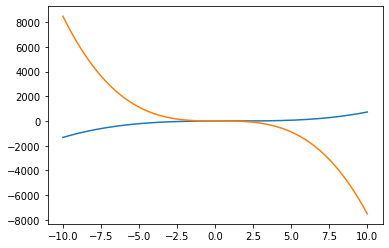

In [56]:
# Display shape

print('shape of x:', x.shape)
y = cubic_bijector(x)
print('shape of y = cubic_bijector(x):', y.shape)
plt.plot(x, y)

shape of y = cubic_bijector.inverse(x): (500, 2)


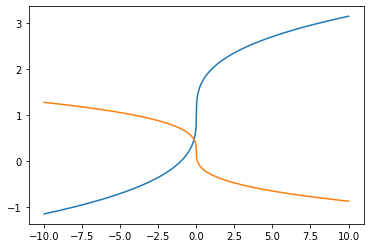

In [57]:
# Plot the inverse

y = cubic_bijector.inverse(x)
print('shape of y = cubic_bijector.inverse(x):', y.shape)
plt.plot(x, y)

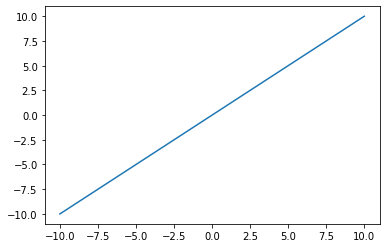

In [58]:
plt.plot(x, cubic_bijector.inverse(cubic_bijector(x)))

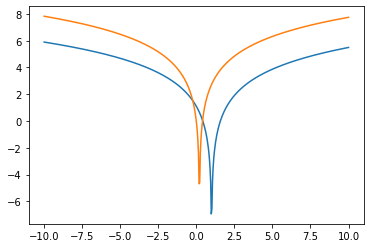

In [59]:
# Plot the forward log Jacobian determinant

plt.plot(x, cubic_bijector.forward_log_det_jacobian(x, event_ndims=0))

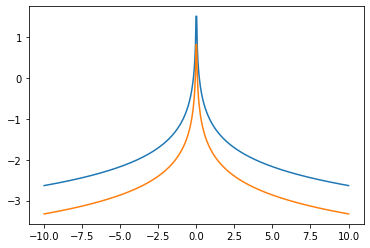

In [60]:
# Plot the inverse log Jacobian determinant

plt.plot(x, cubic_bijector.inverse_log_det_jacobian(x, event_ndims=0))

#### TransformedDistribution and plots

In [61]:
# Create a transformed distribution with Cubic

normal = tfd.Normal(loc=0, scale=1)
cubed_normal = tfd.TransformedDistribution(normal, cubic_bijector, event_shape=[2])
cubed_normal

<tfp.distributions.TransformedDistribution 'CubicNormal' batch_shape=[] event_shape=[2] dtype=float32>

In [62]:
# Sample cubed_normal

n = 10000
g = cubed_normal.sample(n)
print('shape of g:', g.shape)

shape of g: (10000, 2)


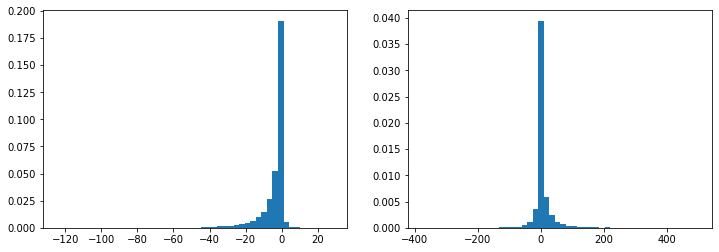

In [63]:
# Plot histograms

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(g[..., 0].numpy(), bins=50, density=True)
plt.subplot(1, 2, 2)
plt.hist(g[..., 1].numpy(), bins=50, density=True)
plt.show()

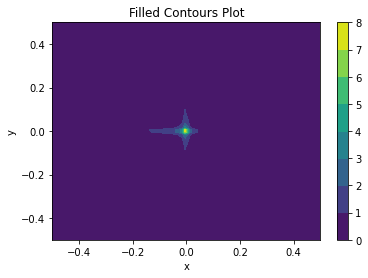

In [64]:
# Make contour plot

xx = np.linspace(-0.5, 0.5, 100)
yy = np.linspace(-0.5, 0.5, 100)
X, Y = np.meshgrid(xx, yy)

fig, ax = plt.subplots(1,1)
Z = cubed_normal.prob(np.dstack((X, Y)))
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [65]:
# Create a transformed distribution with the inverse of Cube

inv_cubic_bijector = tfb.Invert(cubic_bijector)
inv_cubed_normal = tfd.TransformedDistribution(normal, inv_cubic_bijector, event_shape=[2])

In [66]:
# Samble inv_cubed_normal

g = inv_cubed_normal.sample(n)
print('shape of g:', g.shape)

shape of g: (10000, 2)


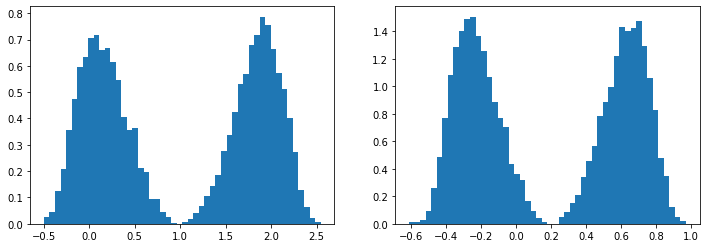

In [67]:
# Plot histograms

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(g[..., 0].numpy(), bins=50, density=True)
plt.subplot(1, 2, 2)
plt.hist(g[..., 1].numpy(), bins=50, density=True)
plt.show()

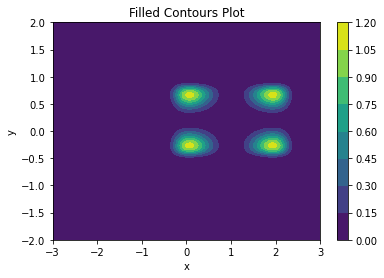

In [68]:
# Make contour plot

xx = np.linspace(-3.0, 3.0, 100)
yy = np.linspace(-2.0, 2.0, 100)
X, Y = np.meshgrid(xx, yy)

fig, ax = plt.subplots(1,1)
Z = inv_cubed_normal.prob(np.dstack((X, Y)))
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

#### Training the bijector

In [69]:
# Create a mixture of two Gaussians

prob = 0.45
probs = [prob, 1-prob]
mix_gauss = tfd.Mixture(
    cat = tfd.Categorical(probs=probs),
    components=[
        tfd.Normal(2.3, 0.4),
        tfd.Normal(-0.8, 0.4)
    ]
)

In [70]:
# Create the dataset

x_train = mix_gauss.sample(10000)
print('shape of x_train:', x_train.shape)
x_train = tf.data.Dataset.from_tensor_slices(x_train)
x_train = x_train.batch(128)

x_valid = mix_gauss.sample(1000)
print('shape of x_valid:', x_valid.shape)
x_valid = tf.data.Dataset.from_tensor_slices(x_valid)
x_valid = x_valid.batch(128)

print(x_train.element_spec)
print(x_valid.element_spec)

shape of x_train: (10000,)
shape of x_valid: (1000,)
TensorSpec(shape=(None,), dtype=tf.float32, name=None)
TensorSpec(shape=(None,), dtype=tf.float32, name=None)


Text(0.5, 1.0, 'Mixture Gaussian distribution')

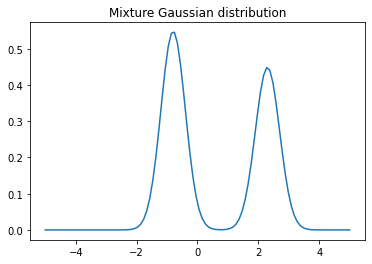

In [71]:
# Plot the data distribution

x = np.linspace(-5, 5, 100)
plt.plot(x, mix_gauss.prob(x))
plt.title('Mixture Gaussian distribution')

In [72]:
# Make a trainable bijector

trainable_inv_cubic_bijector = tfb.Invert(Cubic(tf.Variable(0.25, name='a'), tf.Variable(-0.1, name='b')))
trainable_inv_cubic_bijector.trainable_variables

(<tf.Variable 'a:0' shape=() dtype=float32, numpy=0.25>,
 <tf.Variable 'b:0' shape=() dtype=float32, numpy=-0.1>)

In [73]:
# Make a trainable transformed distribution

trainable_inv_cubed_normal = tfd.TransformedDistribution(normal, trainable_inv_cubic_bijector)

Text(0.5, 1.0, 'Distribution')

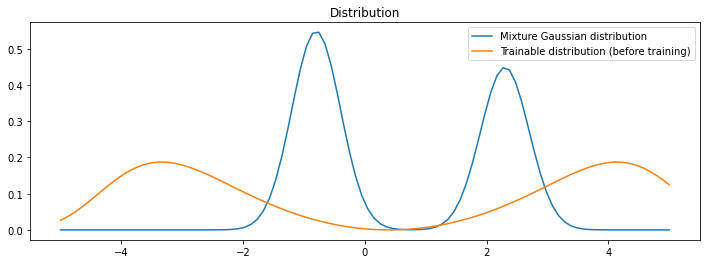

In [74]:
# Plot the data and learned distributions

x = np.linspace(-5, 5, 100)
plt.figure(figsize=(12, 4))
plt.plot(x, mix_gauss.prob(x), label='Mixture Gaussian distribution')
plt.plot(x, trainable_inv_cubed_normal.prob(x), label='Trainable distribution (before training)')
plt.legend()
plt.title('Distribution')

In [75]:
# Train the bijector

num_epochs = 10
opt = tf.keras.optimizers.Adam()
train_losses = []
valid_losses = []

for epoch in range(num_epochs):
    train_loss = tf.keras.metrics.Mean()
    val_loss = tf.keras.metrics.Mean()
    for train_batch in x_train:
        with tf.GradientTape() as tape:
            tape.watch(trainable_inv_cubic_bijector.trainable_variables)
            loss = -trainable_inv_cubed_normal.log_prob(train_batch)
        train_loss(loss)
        grads = tape.gradient(loss, trainable_inv_cubic_bijector.trainable_variables)
        opt.apply_gradients(zip(grads, trainable_inv_cubic_bijector.trainable_variables))
    train_losses.append(train_loss.result().numpy())
    print("Epoch {}: Train loss = {:.4f}".format(epoch, train_losses[-1]))
        
    # Validation
    for valid_batch in x_valid:
        loss = -trainable_inv_cubed_normal.log_prob(valid_batch)
        val_loss(loss)
    valid_losses.append(val_loss.result().numpy())

Epoch 0: Train loss = 2.8599
Epoch 1: Train loss = 2.2089
Epoch 2: Train loss = 1.8512
Epoch 3: Train loss = 1.6225
Epoch 4: Train loss = 1.4900
Epoch 5: Train loss = 1.4109
Epoch 6: Train loss = 1.3557
Epoch 7: Train loss = 1.3143
Epoch 8: Train loss = 1.2841
Epoch 9: Train loss = 1.2627


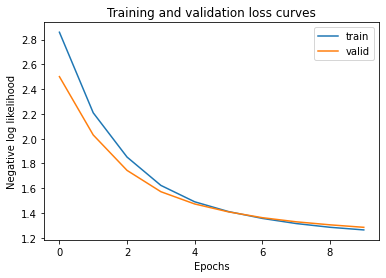

In [76]:
# Plot the learning curves

plt.plot(train_losses, label='train')
plt.plot(valid_losses, label='valid')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Negative log likelihood")
plt.title("Training and validation loss curves")
plt.show()

Text(0.5, 1.0, 'Distribution')

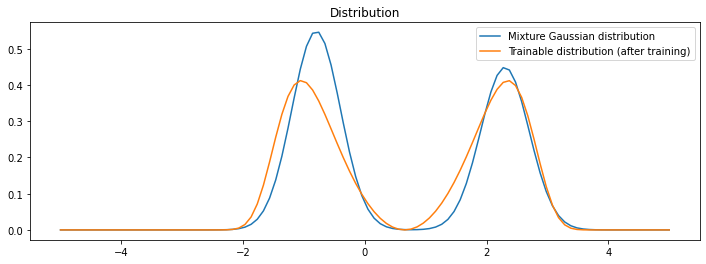

In [77]:
# Plot the data and learned distributions

x = np.linspace(-5, 5, 100)
plt.figure(figsize=(12, 4))
plt.plot(x, mix_gauss.prob(x), label='Mixture Gaussian distribution')
plt.plot(x, trainable_inv_cubed_normal.prob(x), label='Trainable distribution (after training)')
plt.legend()
plt.title('Distribution')

In [78]:
# Display trainable variables

trainable_inv_cubic_bijector.trainable_variables

(<tf.Variable 'a:0' shape=() dtype=float32, numpy=0.5502274>,
 <tf.Variable 'b:0' shape=() dtype=float32, numpy=-0.35934874>)

***
<a id="coding_tutorial_4"></a>
## Normalising flows

In [79]:
# Load dataset

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
n_samples = 1000
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
X, y = noisy_moons
X_data = StandardScaler().fit_transform(X)
xlim, ylim = [-2, 2], [-2, 2]

(-2.0, 2.0)

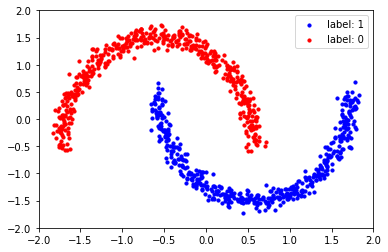

In [80]:
# Plot with labels

y_label = y.astype(np.bool)
X_train, Y_train = X_data[..., 0], X_data[..., 1]
plt.scatter(X_train[y_label], Y_train[y_label], s=10, color='blue')
plt.scatter(X_train[y_label == False], Y_train[y_label == False], s=10, color='red')
plt.legend(['label: 1', 'label: 0'])
plt.xlim(xlim)
plt.ylim(ylim)

In [81]:
# Define base distribution

base_distribution = tfd.Normal(0, 1)

In [82]:
# Define the trainable distribution

hidden_units = [32, 64, 64]
activation = 'relu'
def make_masked_autoregressive_flow(hidden_units=[16, 16], activation='relu'):
    made = tfb.AutoregressiveNetwork(
        params=2,  # two parameters: loc and scale
        event_shape=[2],
        hidden_units=hidden_units,
        activation=activation
    )
    return tfb.MaskedAutoregressiveFlow(shift_and_log_scale_fn=made)

trainable_distribution = tfd.TransformedDistribution(
    base_distribution,
    make_masked_autoregressive_flow(hidden_units, activation),
    event_shape=[2]
)
trainable_distribution

<tfp.distributions.TransformedDistribution 'masked_autoregressive_flowNormal' batch_shape=[] event_shape=[2] dtype=float32>

In [83]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tensorflow.compat.v1 import logging
logging.set_verbosity(logging.ERROR)

In [84]:
# Define a plot contour routine

def plot_contour_prob(dist, rows=1, title=[''], scale_fig=6):
    cols = int(len(dist) / rows)
    xx = np.linspace(-5.0, 5.0, 100)
    yy = np.linspace(-5.0, 5.0, 100)
    X, Y = np.meshgrid(xx, yy)

    fig, ax = plt.subplots(rows, cols, figsize=(scale_fig * cols, scale_fig * rows))
    fig.tight_layout(pad=4.5)

    i = 0
    for r in range(rows):
        for c in range(cols):
            Z = dist[i].prob(np.dstack((X, Y)))
            if len(dist) == 1:
                axi = ax
            elif rows == 1:
                axi = ax[c]
            else:
                axi = ax[r, c]

            # Plot contour
            p = axi.contourf(X, Y, Z)

            # Add a colorbar
            divider = make_axes_locatable(axi)
            cax = divider.append_axes("right", size="5%", pad=0.1)
            cbar = fig.colorbar(p, cax=cax)

            # Set title and labels
            axi.set_title('Filled Contours Plot: ' + str(title[i]))
            axi.set_xlabel('x')
            axi.set_ylabel('y')

            i += 1
    plt.show()

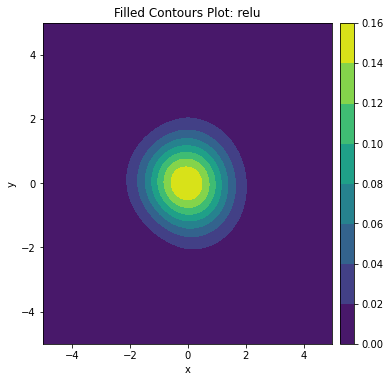

In [85]:
# Plot contour

plot_contour_prob([trainable_distribution], title=[activation])

In [86]:
from tensorflow.keras.layers import Input
from tensorflow.keras import Model

In [87]:
# Make samples

n = 10000
x = base_distribution.sample((n, 2))
y = trainable_distribution.bijector(x)
print('shape of x:', x.shape)
print('shape of y:', y.shape)
samples = [x, y]

shape of x: (10000, 2)
shape of y: (10000, 2)


In [88]:
# Define a scatter plot routine for the bijectors

def _plot(results, rows=1, legend=False):
    cols = int(len(results) / rows)
    f, arr = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
    i = 0
    for r in range(rows):
        for c in range(cols):
            res = results[i]
            X, Y = res[..., 0].numpy(), res[..., 1].numpy()
            if rows == 1:
                p = arr[c]
            else:
                p = arr[r, c]
            p.scatter(X, Y, s=10, color='red')
            p.set_xlim([-5, 5])
            p.set_ylim([-5, 5])
            p.set_title(names[i])
            
            i += 1

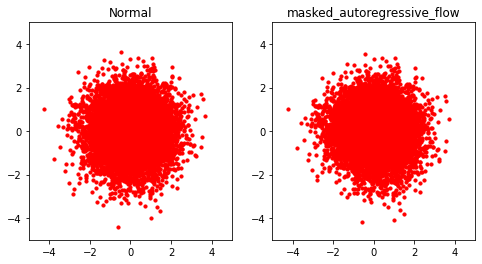

In [89]:
# Plot

names = [base_distribution.name, trainable_distribution.bijector.name]
_plot(samples)

#### Training a MaskedAutoregressiveFlow bijector

In [90]:
from tensorflow.keras.callbacks import LambdaCallback

In [91]:
# Define a training routine

def train_dist_routine(trainable_distribution, n_epochs=200, batch_size=None, n_disp=100):
    x_ = Input(shape=(2,), dtype=tf.float32)
    log_prob_ = trainable_distribution.log_prob(x_)
    model = Model(x_, log_prob_)

    model.compile(optimizer=tf.optimizers.Adam(),
                  loss=lambda _, log_prob: -log_prob)

    ns = X_data.shape[0]
    if batch_size is None:
        batch_size = ns

    # Display the loss every n_disp epoch
    epoch_callback = LambdaCallback(
        on_epoch_end=lambda epoch, logs: 
                        print('\n Epoch {}/{}'.format(epoch+1, n_epochs, logs),
                              '\n\t ' + (': {:.4f}, '.join(logs.keys()) + ': {:.4f}').format(*logs.values()))
                                       if (epoch + 1) % n_disp == 0 else False 
    )


    history = model.fit(x=X_data,
                        y=np.zeros((ns, 0), dtype=np.float32),
                        batch_size=batch_size,
                        epochs=n_epochs,
                        validation_split=0.2,
                        shuffle=True,
                        verbose=False,
                        callbacks=[epoch_callback])
    return history

In [92]:
# Train the distribution

history = train_dist_routine(trainable_distribution, n_epochs=500, n_disp=50)


 Epoch 50/500 
	 loss: 2.6481, val_loss: 2.6423

 Epoch 100/500 
	 loss: 2.5244, val_loss: 2.5071

 Epoch 150/500 
	 loss: 2.1472, val_loss: 2.1494

 Epoch 200/500 
	 loss: 2.0467, val_loss: 2.0343

 Epoch 250/500 
	 loss: 1.9983, val_loss: 1.9842

 Epoch 300/500 
	 loss: 1.9760, val_loss: 1.9708

 Epoch 350/500 
	 loss: 1.9696, val_loss: 1.9751

 Epoch 400/500 
	 loss: 1.9653, val_loss: 1.9833

 Epoch 450/500 
	 loss: 1.9614, val_loss: 1.9843

 Epoch 500/500 
	 loss: 1.9580, val_loss: 1.9987


In [93]:
# Get losses

train_losses = history.history['loss']
valid_losses = history.history['val_loss']

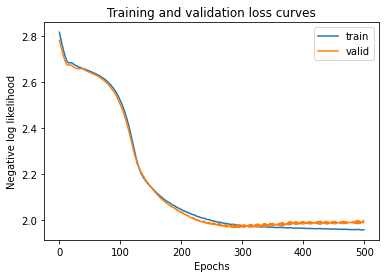

In [94]:
# Plot loss vs epoch

plt.plot(train_losses, label='train')
plt.plot(valid_losses, label='valid')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Negative log likelihood")
plt.title("Training and validation loss curves")
plt.show()

In [95]:
# Make samples

x = base_distribution.sample((n, 2))
y = trainable_distribution.bijector(x)
print('shape of x:', x.shape)
print('shape of y:', y.shape)
samples = [x, y]

shape of x: (10000, 2)
shape of y: (10000, 2)


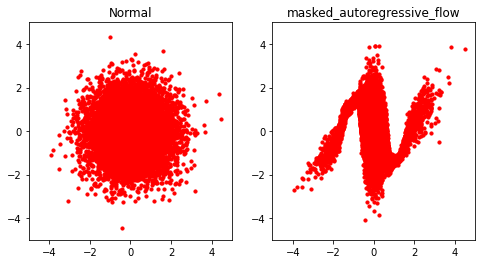

In [96]:
# Plot

_plot(samples)

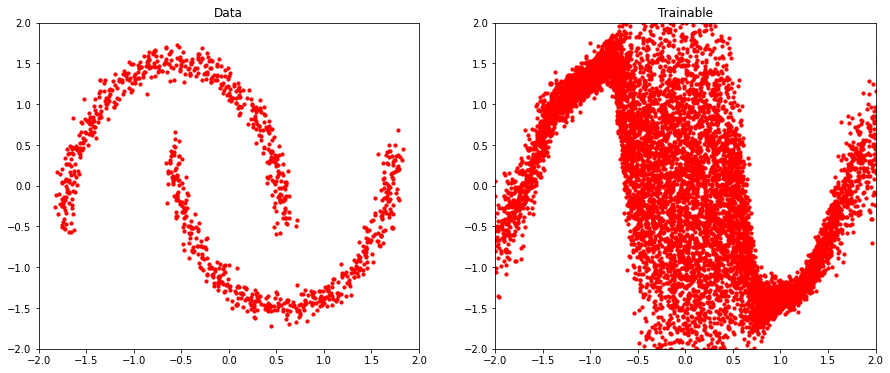

In [97]:
# Define a plot routine

def visualize_training_data(samples):
    f, arr = plt.subplots(1, 2, figsize=(15, 6))
    names = ['Data', 'Trainable']
    samples = [tf.constant(X_data), samples[-1]]

    for i in range(2):
        res = samples[i]
        X, Y = res[..., 0].numpy(), res[..., 1].numpy()
        arr[i].scatter(X, Y, s=10, color='red')
        arr[i].set_xlim([-2, 2])
        arr[i].set_ylim([-2, 2])
        arr[i].set_title(names[i])

visualize_training_data(samples)

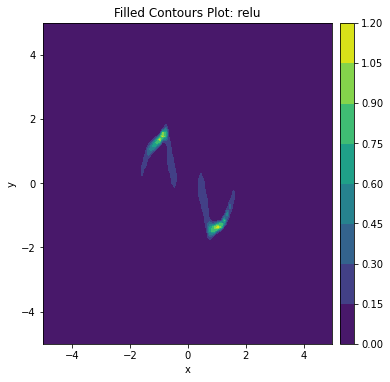

In [98]:
# Plot contour

plot_contour_prob([trainable_distribution], title=[activation])

#### Training a chain of MaskedAutoregressiveFlow bijectors

In [99]:
# Define a more expressive model

n_bijectors = 6
hidden_units = [128, 256, 256]

bijectors = []

for i in range(n_bijectors):
    maf = make_masked_autoregressive_flow(hidden_units, activation)
    bijectors.append(maf)
    bijectors.append(tfb.Permute([1, 0]))

    
flow_bijector = tfb.Chain(list(reversed(bijectors[:-1])))

In [100]:
# Define the trainable distribution

trainable_distribution = tfd.TransformedDistribution(base_distribution, flow_bijector, event_shape=[2])
trainable_distribution

<tfp.distributions.TransformedDistribution 'chain_of_masked_autoregressive_flow_of_permute_of_masked_autoregressive_flow_of_permute_of_masked_autoregressive_flow_of_permute_of_masked_autoregressive_flow_of_permute_of_masked_autoregressive_flow_of_permute_of_masked_autoregressive_flowNormal' batch_shape=[] event_shape=[2] dtype=float32>

In [101]:
# Make samples

def make_samples():
    x = base_distribution.sample((1000, 2))
    samples = [x]
    names = [base_distribution.name]
    for bijector in reversed(trainable_distribution.bijector.bijectors):
        x = bijector.forward(x)
        samples.append(x)
        names.append(bijector.name)
    return names, samples

names, samples = make_samples()
print(names)
print(samples)
print([s.shape for s in samples])

['Normal', 'masked_autoregressive_flow', 'permute', 'masked_autoregressive_flow', 'permute', 'masked_autoregressive_flow', 'permute', 'masked_autoregressive_flow', 'permute', 'masked_autoregressive_flow', 'permute', 'masked_autoregressive_flow']
[<tf.Tensor: shape=(1000, 2), dtype=float32, numpy=
array([[-0.06443634, -0.29900837],
       [-0.7541952 ,  1.1341347 ],
       [ 0.33100742,  0.03961923],
       ...,
       [-0.22022144,  0.69009435],
       [ 0.42425385, -0.04546813],
       [-0.6147856 ,  0.57995796]], dtype=float32)>, <tf.Tensor: shape=(1000, 2), dtype=float32, numpy=
array([[-0.06443634, -0.2994721 ],
       [-0.7541952 ,  1.006065  ],
       [ 0.33100742,  0.02861968],
       ...,
       [-0.22022144,  0.66316   ],
       [ 0.42425385, -0.05957174],
       [-0.6147856 ,  0.5135654 ]], dtype=float32)>, <tf.Tensor: shape=(1000, 2), dtype=float32, numpy=
array([[-0.2994721 , -0.06443634],
       [ 1.006065  , -0.7541952 ],
       [ 0.02861968,  0.33100742],
       ...,
   

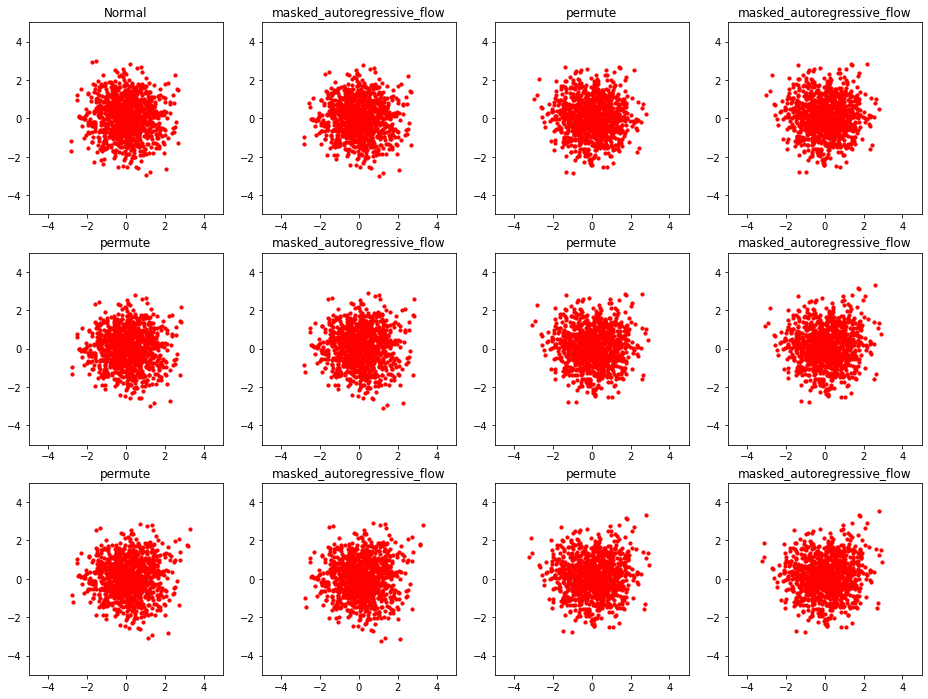

In [102]:
# Plot

_plot(samples, 3)

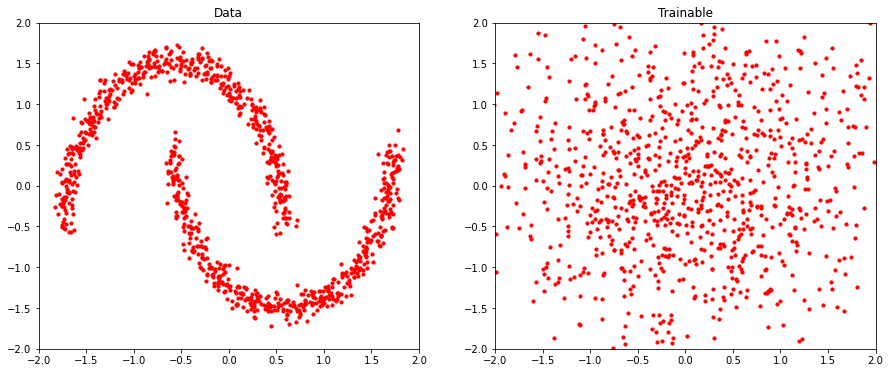

In [103]:
# Plot

visualize_training_data(samples)

In [104]:
# Train the distribution

history = train_dist_routine(trainable_distribution, n_epochs=500, n_disp=50)


 Epoch 50/500 
	 loss: 2.3587, val_loss: 2.2641

 Epoch 100/500 
	 loss: 1.8640, val_loss: 1.8811

 Epoch 150/500 
	 loss: 1.5878, val_loss: 1.5702

 Epoch 200/500 
	 loss: 1.5551, val_loss: 1.5324

 Epoch 250/500 
	 loss: 1.6303, val_loss: 1.6206

 Epoch 300/500 
	 loss: 1.2413, val_loss: 1.3295

 Epoch 350/500 
	 loss: 1.1719, val_loss: 1.3137

 Epoch 400/500 
	 loss: 1.1322, val_loss: 1.2933

 Epoch 450/500 
	 loss: 1.1371, val_loss: 1.2659

 Epoch 500/500 
	 loss: 1.1976, val_loss: 1.2939


In [105]:
# Get losses

train_losses = history.history['loss']
valid_losses = history.history['val_loss']

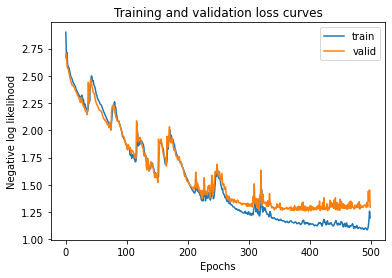

In [106]:
# Plot loss vs epoch

plt.plot(train_losses, label='train')
plt.plot(valid_losses, label='valid')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Negative log likelihood")
plt.title("Training and validation loss curves")
plt.show()

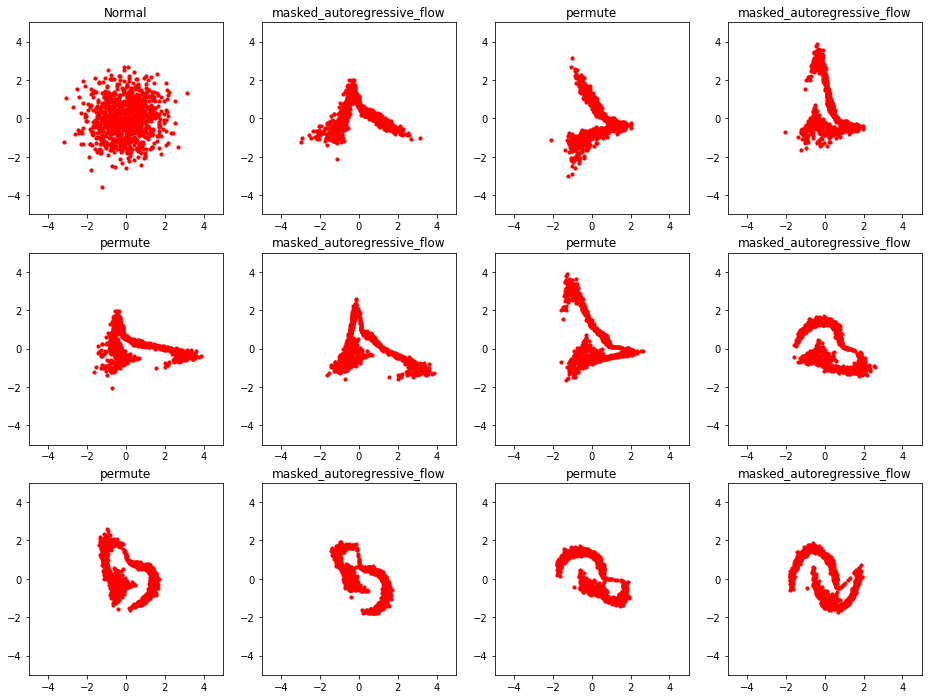

In [107]:
# Make samples and plot

names, samples = make_samples()
_plot(samples, 3)

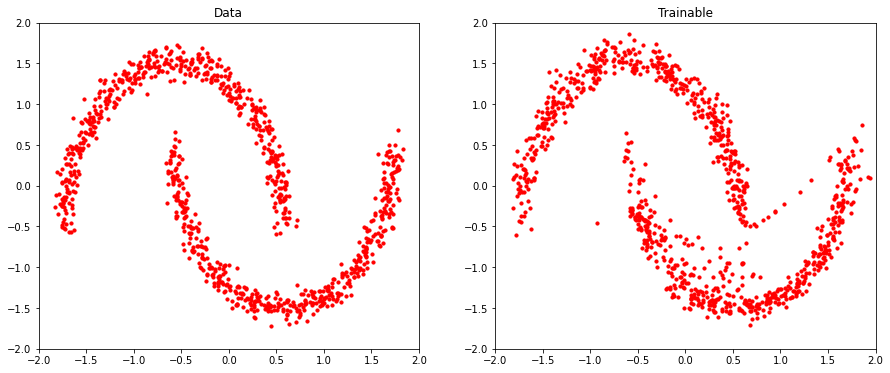

In [108]:
# Plot

visualize_training_data(samples)

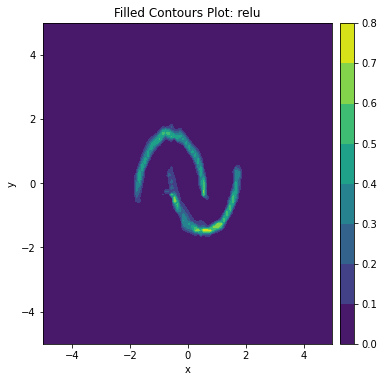

In [109]:
# Plot

plot_contour_prob([trainable_distribution], title=[activation])